# AutoscoutDataAnalysis


In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output


In [2]:
# The cleaning is done in "notebook.ipynb"
df_clean = pd.read_csv("cleaned_cars.csv")
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15426 entries, 0 to 15425
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   url                 15426 non-null  object 
 1   brand               15426 non-null  object 
 2   model               15426 non-null  object 
 3   price               15424 non-null  float64
 4   first_registration  15426 non-null  object 
 5   mileage             15426 non-null  object 
 6   fuel_type           15426 non-null  object 
 7   color               15426 non-null  object 
 8   gearbox             15426 non-null  object 
 9   power               15188 non-null  float64
 10  engine_size         14581 non-null  float64
 11  seller              15426 non-null  object 
 12  location            15426 non-null  object 
 13  body_type           15426 non-null  object 
 14  doors               15426 non-null  object 
 15  seats               15426 non-null  object 
 16  driv

In [3]:
df_clean.head()

,url,brand,model,price,first_registration,mileage,fuel_type,color,gearbox,power,...,body_type,doors,seats,drivetrain,co2_emission,emission_class,condition,upholstery,upholstery_color,country
0,https://www.autoscout24.com/offers/alfa-romeo-...,alfa romeo,159,5500.0,2011-01-01,233685,diesel,red,manual,100.0,...,sedan,4,5,front,unknown,134 g/km (comb.),used,grey,others,IT
1,https://www.autoscout24.com/offers/alfa-romeo-...,alfa romeo,159,13990.0,2010-01-01,134000,gasoline,red,manual,147.0,...,sedan,4,5,front,unknown,unknown,used,unknown,unknown,ES
2,https://www.autoscout24.com/offers/renault-oth...,renault,unknown,2300.0,1963-01-01,27000,gasoline,yellow,manual,59.0,...,sedan,unknown,unknown,unknown,unknown,unknown,used,unknown,alcantara,BE
3,https://www.autoscout24.com/offers/opel-antara...,opel,antara,3499.0,2008-01-01,212575,gasoline,black,manual,103.0,...,off-road/pick-up,5,5,4wd,unknown,229 g/km (comb.),used,unknown,metallic,NL
4,https://www.autoscout24.com/offers/alfa-romeo-...,alfa romeo,giulia,39800.0,2023-01-01,7100,gasoline,white,automatic,206.0,...,sedan,4,4,front,Euro 6d,unknown,employee's car,full leather,black,DE


### First cleaned data analysis

The folowing help to add visualise the actual cleandata and do some corection on the data cleaning notebook

In [4]:
    """_summary_
    
    Improvement found : 
    
    # To improve the nulls on the date, we''re giving a cutoff date : 1900-01-01
    df_clean['first_registration'] = pd.to_datetime(df_clean['first_registration'])
    df_clean['first_registration'] = df_clean['first_registration'].fillna(pd.Timestamp('1900-01-01'))
    
    
    df['price'] = pd.to_numeric(df['price'], errors='coerce') # Clean the unknown in the price column with NaN (Wich pandas recognize)
    
    """

"_summary_\n\nImprovement found : \n\n# To improve the nulls on the date, we''re giving a cutoff date : 1900-01-01\ndf_clean['first_registration'] = pd.to_datetime(df_clean['first_registration'])\ndf_clean['first_registration'] = df_clean['first_registration'].fillna(pd.Timestamp('1900-01-01'))\n\n\ndf['price'] = pd.to_numeric(df['price'], errors='coerce') # Clean the unknown in the price column with NaN (Wich pandas recognize)\n\n"

In [5]:
# Lets analyze the features caractéristics with describe :
df_clean.describe()

,price,power,engine_size
count,1.542400e+04,15188.000000,14581.000000
mean,8.716821e+04,187.520016,81.905768
std,8.615921e+05,137.935629,267.568536
min,1.000000e+00,1.000000,0.000000
25%,1.499900e+04,90.000000,1.000000
50%,2.499000e+04,132.000000,1.000000
75%,4.690000e+04,239.000000,3.000000
max,1.000000e+08,883.000000,999.000000


In [6]:
# On regarde le nombre de valeurs uniques dans chaque column du dataset
for column in df_clean.columns:
    print(f"{column}: {df_clean[column].nunique()} unique values")
    

url: 15426 unique values
brand: 42 unique values
model: 888 unique values
price: 4493 unique values
first_registration: 90 unique values
mileage: 8738 unique values
fuel_type: 11 unique values
color: 285 unique values
gearbox: 79 unique values
power: 498 unique values
engine_size: 38 unique values
seller: 3 unique values
location: 3134 unique values
body_type: 10 unique values
doors: 1407 unique values
seats: 224 unique values
drivetrain: 144 unique values
co2_emission: 422 unique values
emission_class: 584 unique values
condition: 7 unique values
upholstery: 17 unique values
upholstery_color: 19 unique values
country: 9 unique values


In [7]:
# Analyze the missing data (so the : Nones, NaNsn, )
print("\nMissing data in each column:")
print(df_clean.isnull().sum())


Missing data in each column:
url                     0
brand                   0
model                   0
price                   2
first_registration      0
mileage                 0
fuel_type               0
color                   0
gearbox                 0
power                 238
engine_size           845
seller                  0
location                0
body_type               0
doors                   0
seats                   0
drivetrain              0
co2_emission            0
emission_class          0
condition               0
upholstery              0
upholstery_color        0
country                 0
dtype: int64


## Analyse des résultats


Statistique descriptive : analyse des trends 
            (prix par pays, 
            par marque, 
            par carrosserie, 
            par type de carburant, 
            par année, 
            par nombre de kilomètres)    




In [8]:
df_analyse = df_clean
df_analyse.dropna(subset=['price'], inplace=True) # drop the NaN in the prices
# Maybe we can add it on the previous notebook


### Analyse Price by country

We have 8 country in this dataset : 
- Italy : IT
- Spain : ES
- Belgium : BE
- Netherland : NL
- Deutschland : DE
- Austria : AT
- France: FR 
- Luxembourg : LU

With this analysis, we decided to visualize the cars price distribution by country (can be see in the subplot). We can see that the big amount of cars are between 10k and 30k exept with france and Luxembourg. This can be due to various factor. First is that we scraped autoscout.com and ther is a autoscout.fr wich probably have more regular french offer.

We also are more interested in the median of the price since some car extremly more expensiv than other. With no suprice the country with the highest median are also Luxembourg and France

In [9]:
countrys = df_analyse['country'].unique()
print(countrys)

['IT' 'ES' 'BE' 'NL' 'DE' 'AT' 'FR' 'LU']


In [10]:
# Some random statistique about each country
for country in countrys:
    
    country_data = df_analyse[df_analyse['country'] == country]

    mean = country_data['price'].mean()
    median = country_data['price'].median()
    min = country_data['price'].min()
    max = country_data['price'].max()
    
    print(f"Some stats in {country}:")
    print(f"  The mean price is {mean:.2f} Euros")
    print(f"  The median price for a car is: {median:.2f} Euros")
    print(f"  The minimum price: {min:.2f} Euros")
    print(f"  And the maximum price: {max:.2f} Euros")

Some stats in IT:
  The mean price is 40943.41 Euros
  The median price for a car is: 18500.00 Euros
  The minimum price: 500.00 Euros
  And the maximum price: 2450000.00 Euros
Some stats in ES:
  The mean price is 139130.55 Euros
  The median price for a car is: 26900.00 Euros
  The minimum price: 1590.00 Euros
  And the maximum price: 9000000.00 Euros
Some stats in BE:
  The mean price is 52402.29 Euros
  The median price for a car is: 23900.00 Euros
  The minimum price: 1200.00 Euros
  And the maximum price: 9999999.00 Euros
Some stats in NL:
  The mean price is 50485.80 Euros
  The median price for a car is: 14950.00 Euros
  The minimum price: 599.00 Euros
  And the maximum price: 3999950.00 Euros
Some stats in DE:
  The mean price is 98615.95 Euros
  The median price for a car is: 27999.00 Euros
  The minimum price: 1.00 Euros
  And the maximum price: 99999999.00 Euros
Some stats in AT:
  The mean price is 105695.18 Euros
  The median price for a car is: 33990.00 Euros
  The minim

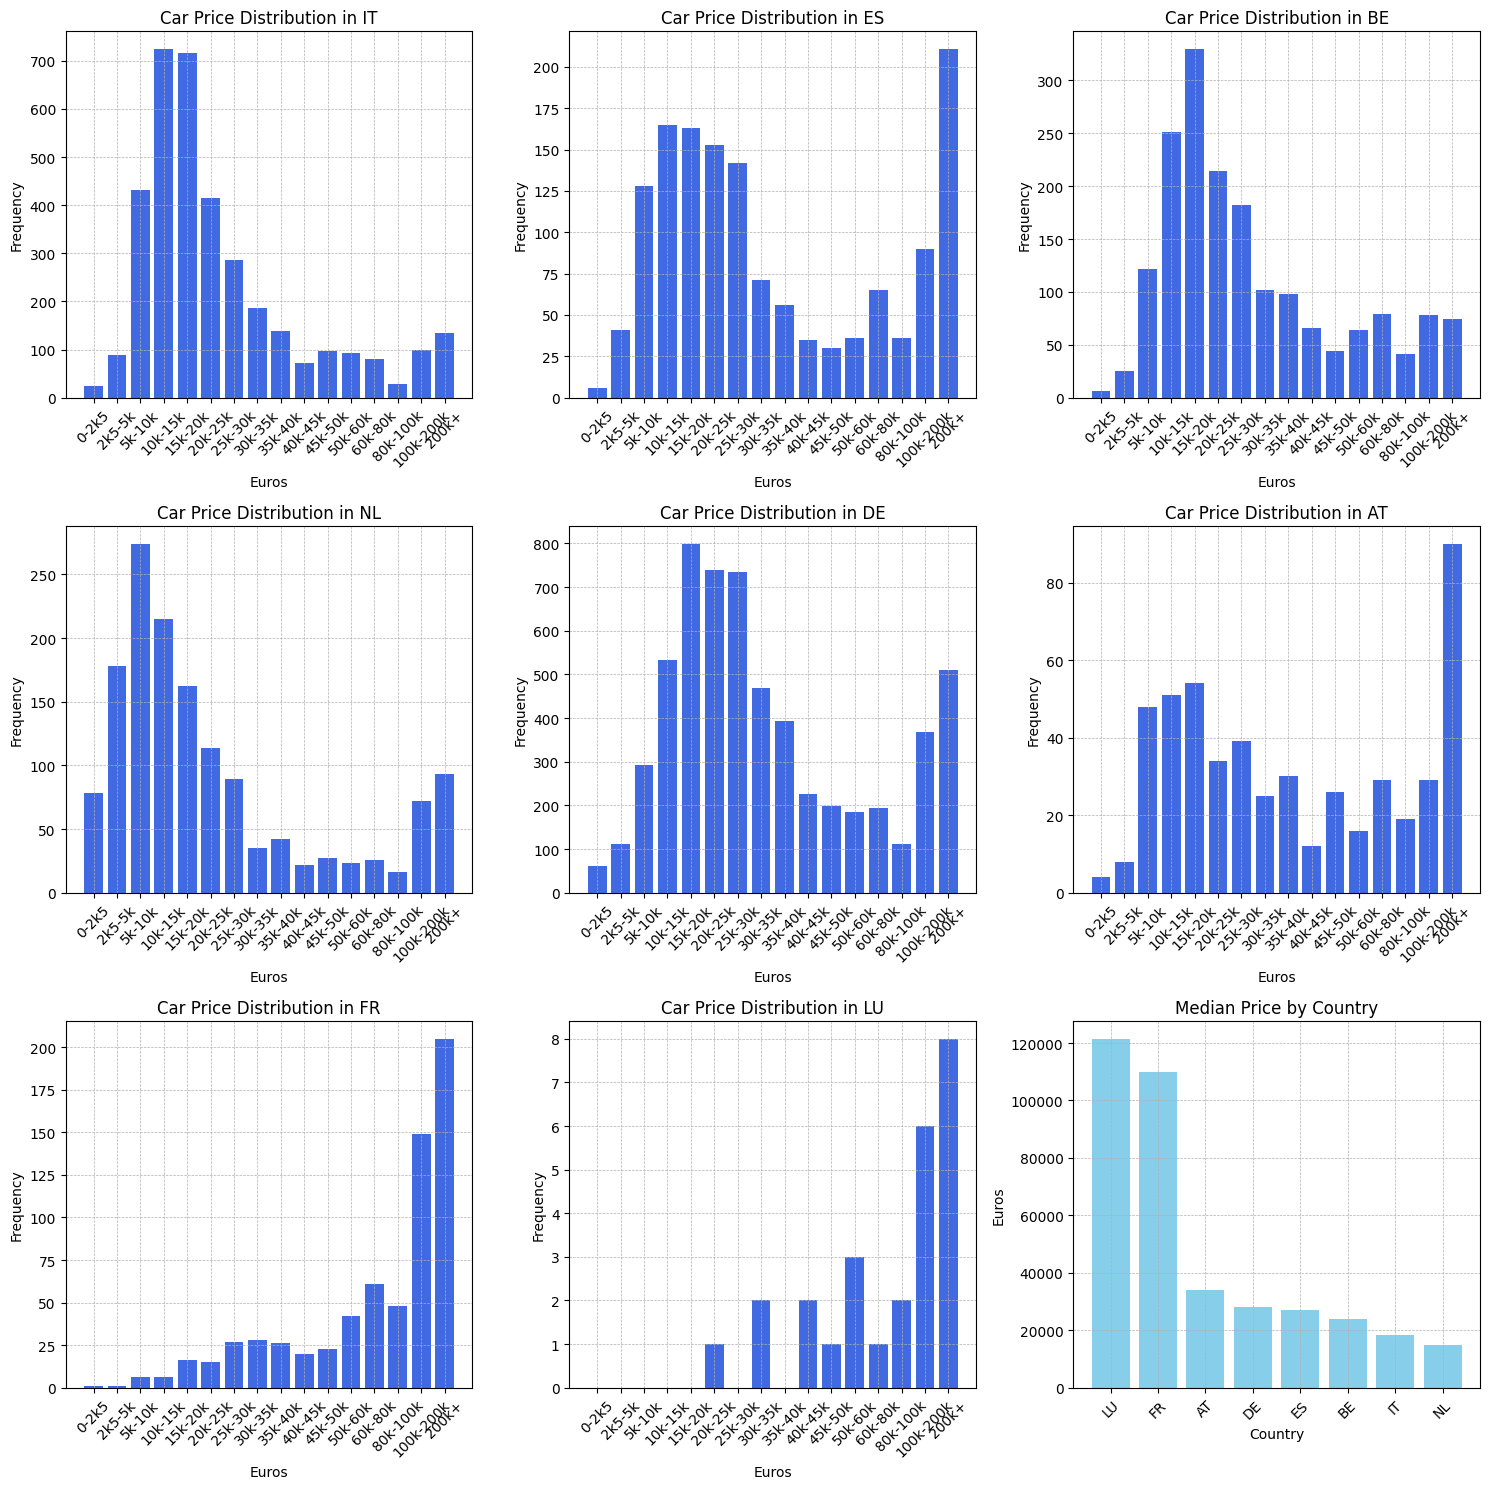

In [11]:
# Setting the bins and labels
bins = [0, 2500, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000, 60000, 80000, 100000, 200000, np.inf]
labels = ['0-2k5', '2k5-5k', '5k-10k', '10k-15k', '15k-20k', '20k-25k', '25k-30k', '30k-35k', '35k-40k', '40k-45k', '45k-50k', '50k-60k', '60k-80k', '80k-100k', '100k-200k', '200k+']

# Function to avoid the " setting with copy " warning from pd
def price_cat(df, country):
    indice = df['country'] == country
    df.loc[indice, 'price_bin'] = pd.cut(df.loc[indice, 'price'], bins=bins, labels=labels)
    return df.loc[indice, 'price_bin']

# val initialisating
nCountry = len(countrys)
cols = 3
rows = (nCountry + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten()

for index, country in enumerate(countrys):
    ax = axes[index]
    
    df_analyse['price_bin'] = price_cat(df_analyse, country)
    price_counts = df_analyse[df_analyse['country'] == country]['price_bin'].value_counts().sort_index()

    # Plot the bars of the price for one country
    ax.bar(price_counts.index, price_counts.values, color='royalblue')
    ax.set_title(f'Car Price Distribution in {country}')
    ax.set_xlabel('Euros')
    ax.set_ylabel('Frequency')
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Plot the median price by country
med_prices = df_analyse.groupby('country')['price'].median().sort_values(ascending=False) #The median is more reprenentative for me
ax = axes[nCountry]  
ax.bar(med_prices.index, med_prices.values, color='skyblue')
ax.set_title('Median Price by Country')
ax.set_xlabel('Country')
ax.set_ylabel('Euros')
ax.tick_params(axis='x', rotation=45)
ax.grid(True, linestyle='--', linewidth=0.5)

# Adjustments for the plot
plt.tight_layout()
plt.show()

#drop the added column : 
df_analyse.drop('price_bin', axis=1, inplace=True)


### Analyse Price by brand

The analysis of price by brand show the price for exery brand in the dataset. In the dataset:

 There are  41  brands:
['alfa romeo' 'renault' 'opel' 'bugatti' 'chevrolet' 'cadillac' 'citroen'
 'audi' 'ferrari' 'cupra' 'aston martin' 'dacia' 'corvette' 'bentley'
 'volkswagen' 'ford' 'bmw' 'honda' 'jeep' 'land rover' 'mazda'
 'mitsubishi' 'nissan' 'porsche' 'mclaren' 'hyundai' 'maserati' 'mini'
 'peugeot' 'rolls-royce' 'lexus' 'lamborghini' 'kia' 'jaguar' 'skoda'
 'smart' 'subaru' 'suzuki' 'seat' 'toyota' 'tesla']

The price comparaison is made with the median price.
The brand with the most expensive median are the Bugatti, wich make sense, and the less are the Smart. 
We did 2 plot, one with every brand, and one without the luxous cars to increase readbility beacause those luxous cars had prices in another scale than the more commun prices. 

The last plot can be manipulated. We can choose the brand and we can see the price distribution between the brands model

I can't think of other interessting information about price and brand. Add here in case:

In [13]:
brands = df_analyse['brand'].unique()
print("There are ", brands.size, " brands")
print(brands)

There are  41  brands
['alfa romeo' 'renault' 'opel' 'bugatti' 'chevrolet' 'cadillac' 'citroen'
 'audi' 'ferrari' 'cupra' 'aston martin' 'dacia' 'corvette' 'bentley'
 'volkswagen' 'ford' 'bmw' 'honda' 'jeep' 'land rover' 'mazda'
 'mitsubishi' 'nissan' 'porsche' 'mclaren' 'hyundai' 'maserati' 'mini'
 'peugeot' 'rolls-royce' 'lexus' 'lamborghini' 'kia' 'jaguar' 'skoda'
 'smart' 'subaru' 'suzuki' 'seat' 'toyota' 'tesla']


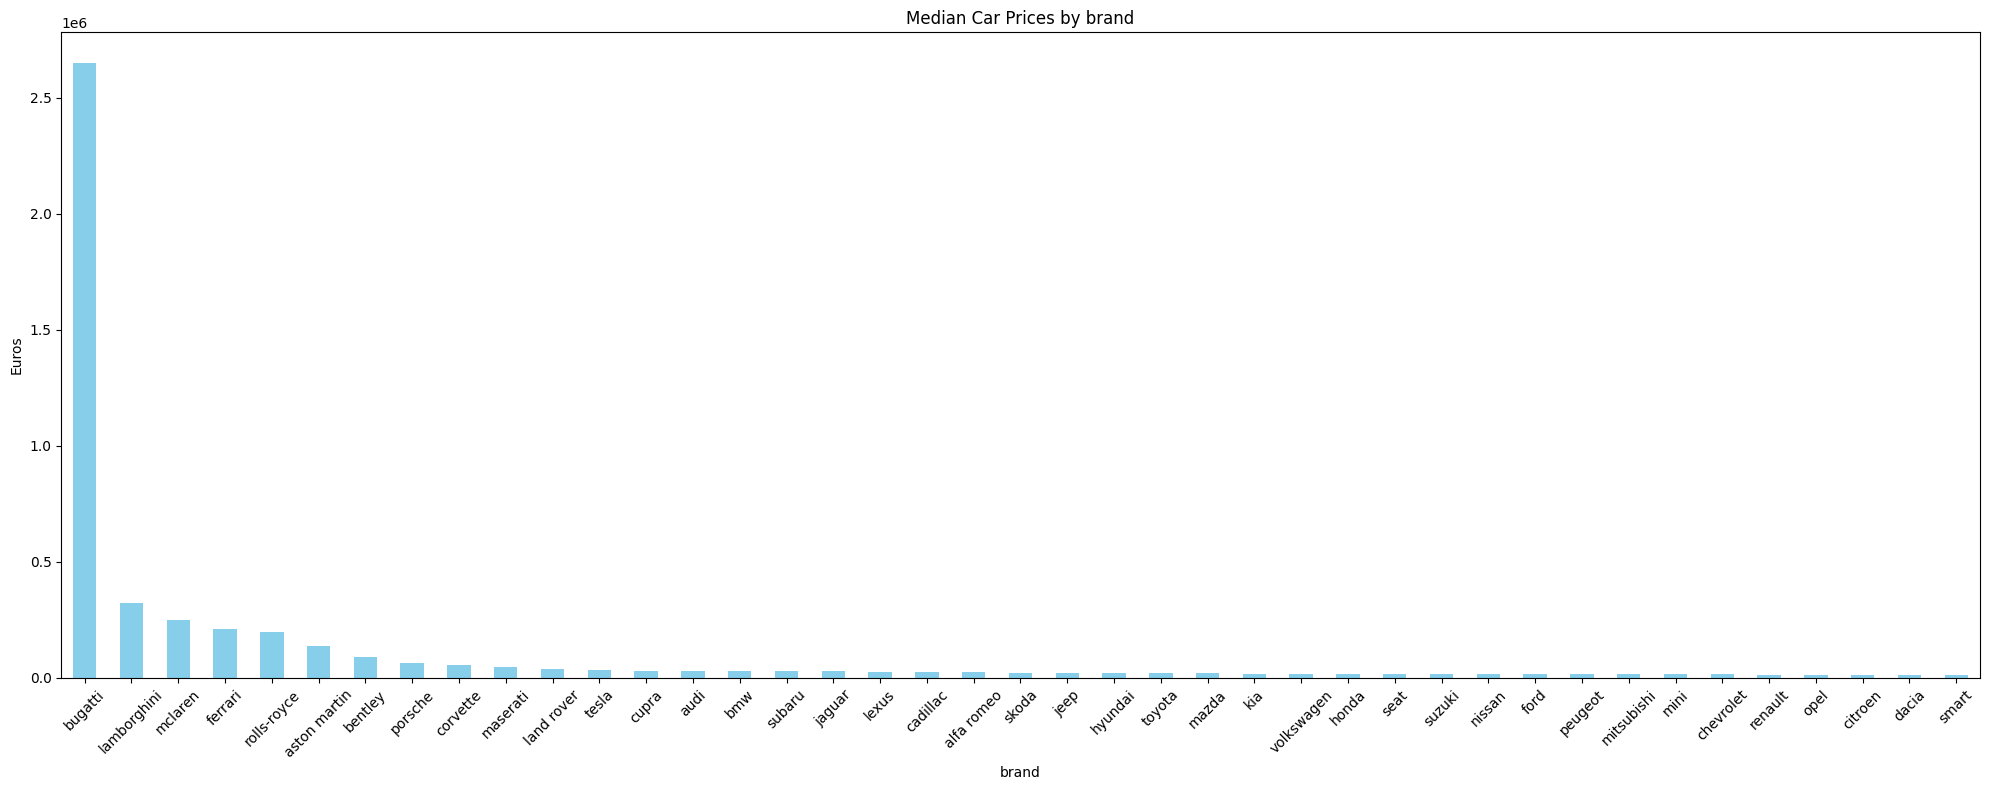

In [62]:
# Car analysis
med_prices = df_analyse.groupby('brand')['price'].median().sort_values(ascending=False)
# Plot
plt.figure(figsize=(20, 8))  
med_prices.plot(kind='bar', color='skyblue')
plt.title('Median Car Prices by brand')
plt.xlabel('brand')
plt.ylabel('Euros')
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()


In [15]:
med_prices.head()

brand
bugatti        2650000.0
lamborghini     324995.0
mclaren         249900.0
ferrari         212990.0
rolls-royce     199990.0
Name: price, dtype: float64

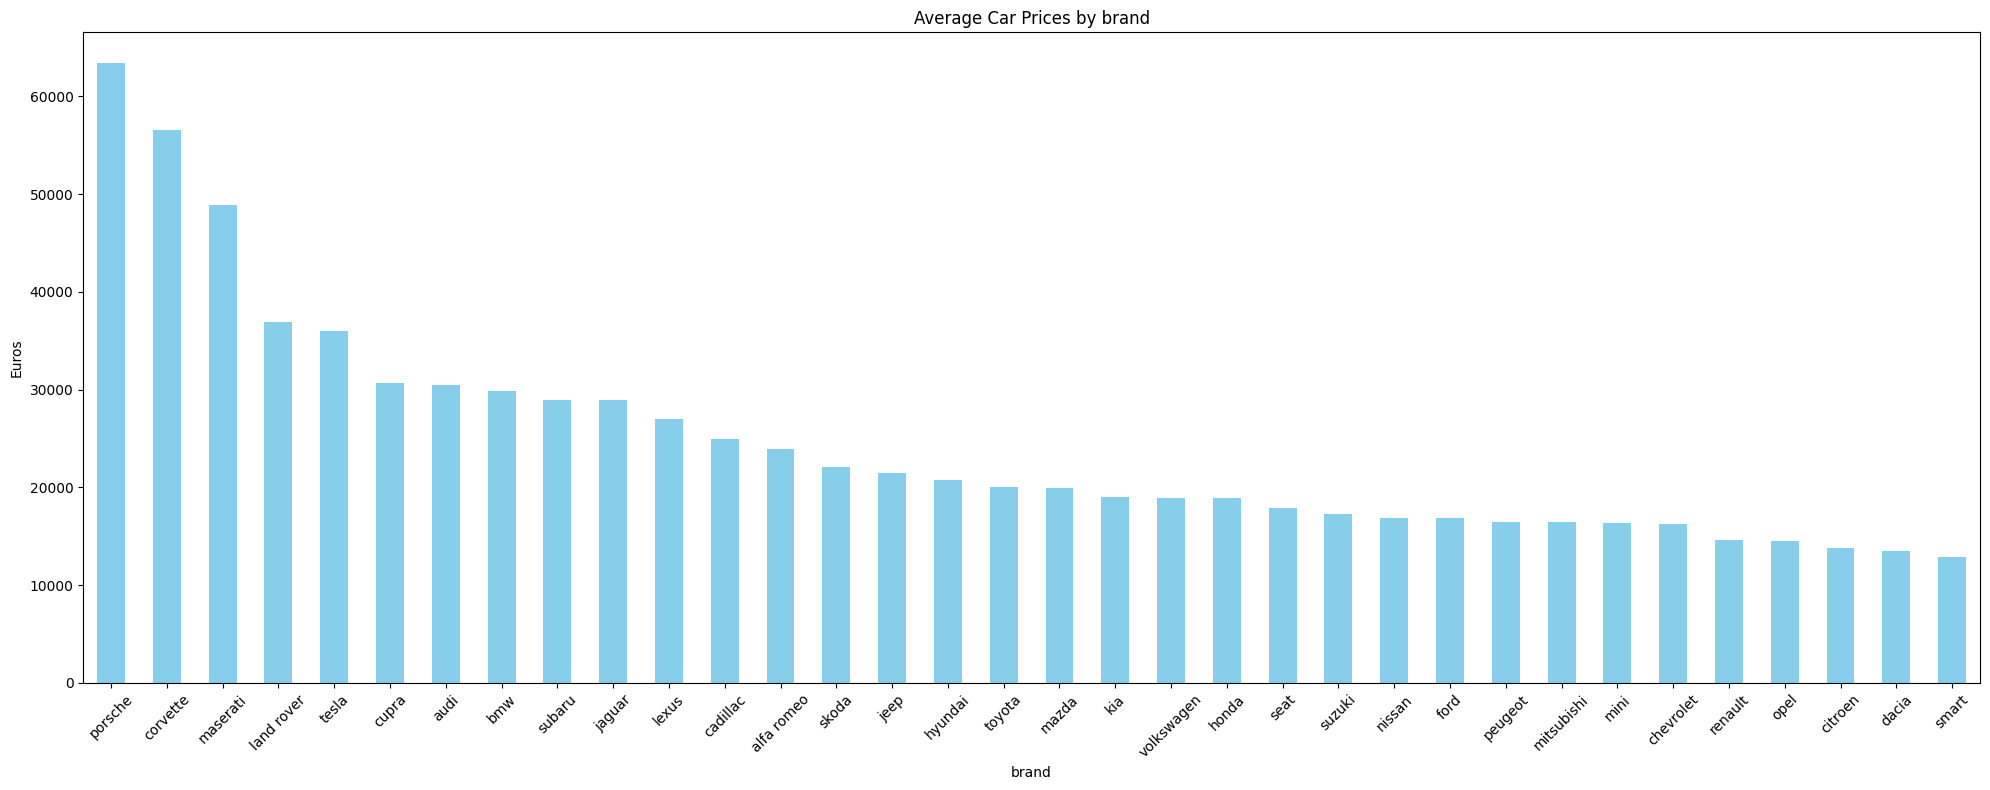

In [39]:
# Car analysis without Luxus car (until porshe)

# Plot
plt.figure(figsize=(20, 8))  
med_prices[7:].plot(kind='bar', color='skyblue')
plt.title('Median Car Prices by brand')
plt.xlabel('brand')
plt.ylabel('Euros')
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()


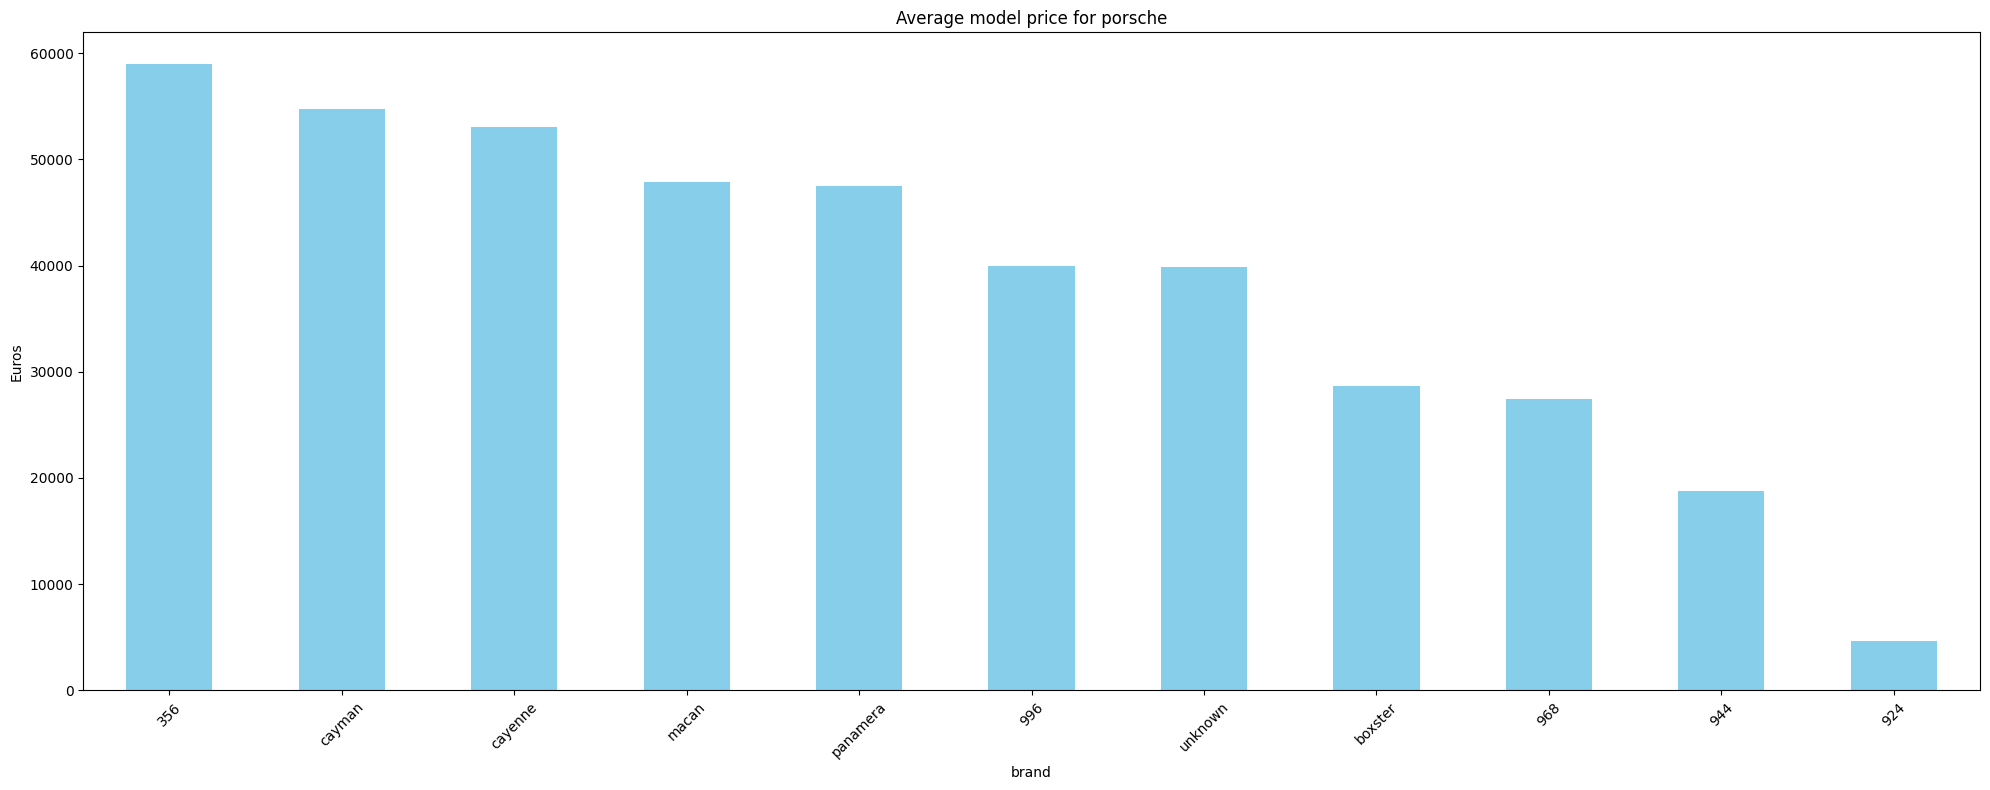

In [52]:
"""brands :
['alfa romeo' 'renault' 'opel' 'bugatti' 'chevrolet' 'cadillac' 'citroen'
 'audi' 'ferrari' 'cupra' 'aston martin' 'dacia' 'corvette' 'bentley'
 'volkswagen' 'ford' 'bmw' 'honda' 'jeep' 'land rover' 'mazda'
 'mitsubishi' 'nissan' 'porsche' 'mclaren' 'hyundai' 'maserati' 'mini'
 'peugeot' 'rolls-royce' 'lexus' 'lamborghini' 'kia' 'jaguar' 'skoda'
 'smart' 'subaru' 'suzuki' 'seat' 'toyota' 'tesla']
"""
# Choose the brand to analyze
brand = 'porsche'

brand_data = df_analyse[df_analyse['brand'] == brand]
model_in_brand_med_price = brand_data.groupby('model')['price'].median().sort_values(ascending=False)

plt.figure(figsize=(20, 8))  
model_in_brand_med_price[:].plot(kind='bar', color='skyblue')
plt.title(f'Median model price for {brand}')
plt.xlabel('brand')
plt.ylabel('Euros')
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()


Dropdown(description='Brand:', index=31, options=('alfa romeo', 'aston martin', 'audi', 'bentley', 'bmw', 'bug…

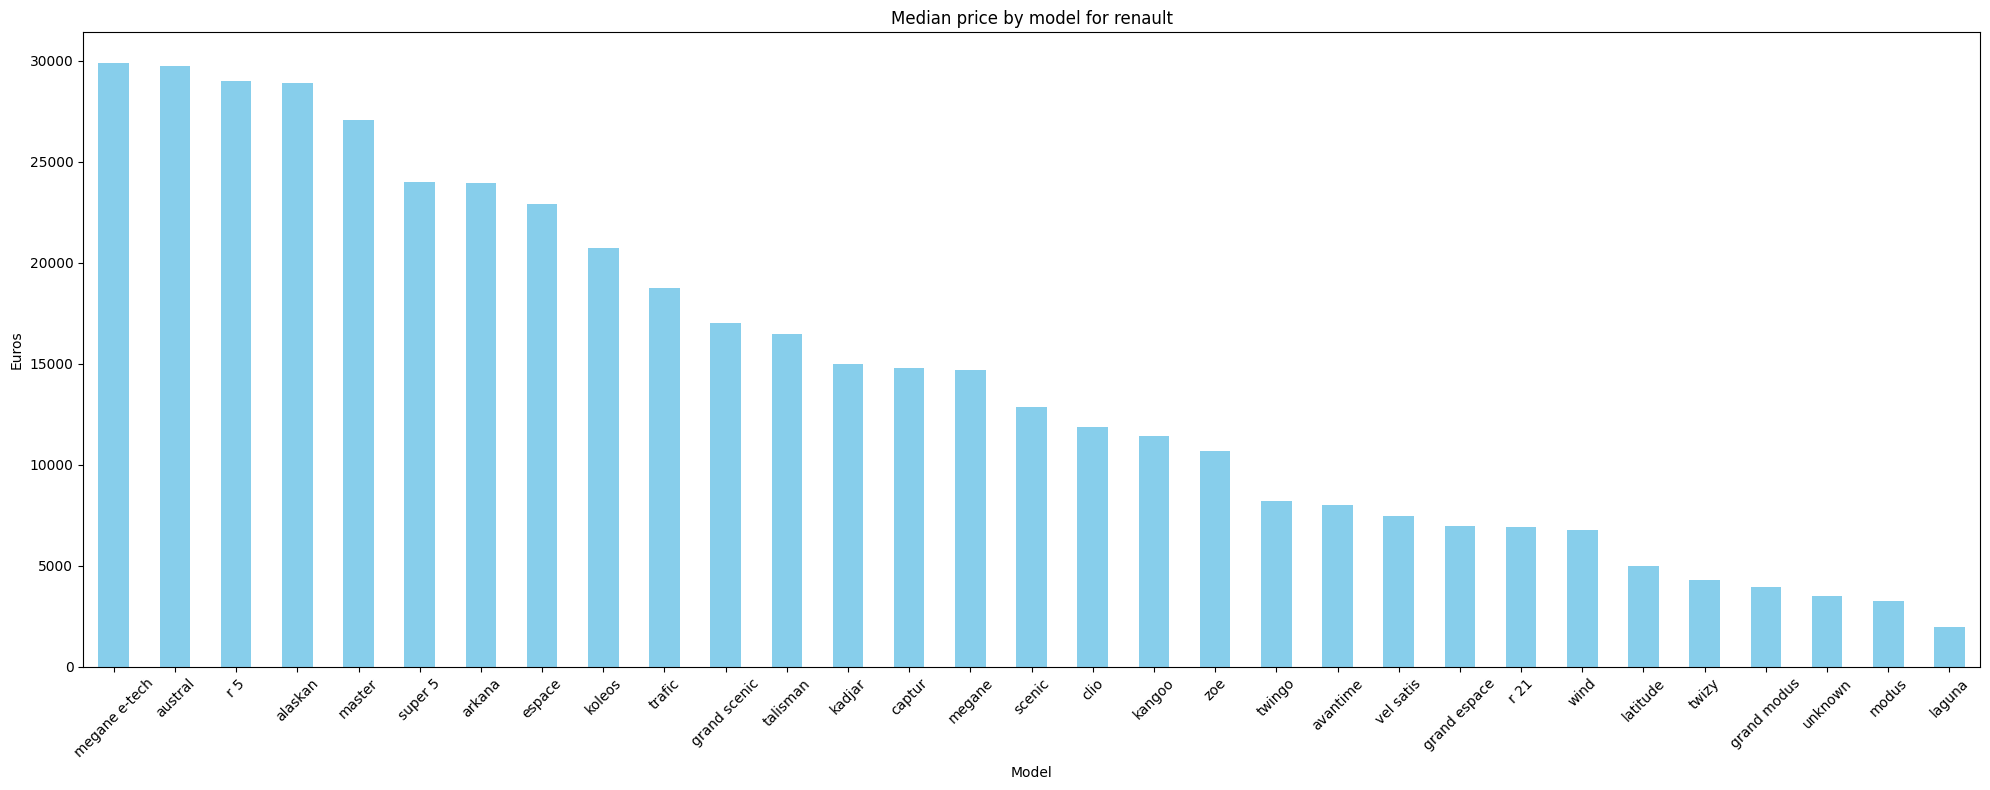

In [63]:
brand_selector = widgets.Dropdown(
    options=sorted(brands),
    value='renault',  # Default value
    description='Brand:',
    disabled=False,
)

# Fucntion to update and plot
def update_plot(brand):
    clear_output(wait=True)
    display(brand_selector)
    brand_data = df_analyse[df_analyse['brand'] == brand]
    model_in_brand_med_price = brand_data.groupby('model')['price'].median().sort_values(ascending=False)

    plt.figure(figsize=(20, 8))
    model_in_brand_med_price.plot(kind='bar', color='skyblue')
    plt.title(f'Median price by model for {brand}')
    plt.xlabel('Model')
    plt.ylabel('Euros')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# function when changing the value
def on_brand_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        update_plot(change['new'])

brand_selector.observe(on_brand_change)

update_plot(brand_selector.value)

### Analyse Price by year

In this part, we used the date (By looking at the registration date) to analyse the price variation (Median of the price again). Looking at the variation by day was maybe too exagerated. Il the first plot, we observe the variation since the beginin. We can observe the line plot representing the price, and the bar behind representing the number of data. We can see that until year 2000, there are not many cars to sell. And some are more collection pieces with high prices. 

That is why we did the second plot representing the data from the year 2000 until today. We can see that the data move a lot until 2010 where it begin to climb slowly. This make sens, since the older is the car, the less expesive it get.

In [18]:
df_year = df_analyse
df_year['first_registration'] = pd.to_datetime(df_year['first_registration'], errors='coerce')  

C:\Users\Damian\AppData\Local\Temp\ipykernel_40812\669530017.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year['decade'] = (df_year['year'] // 10) * 10


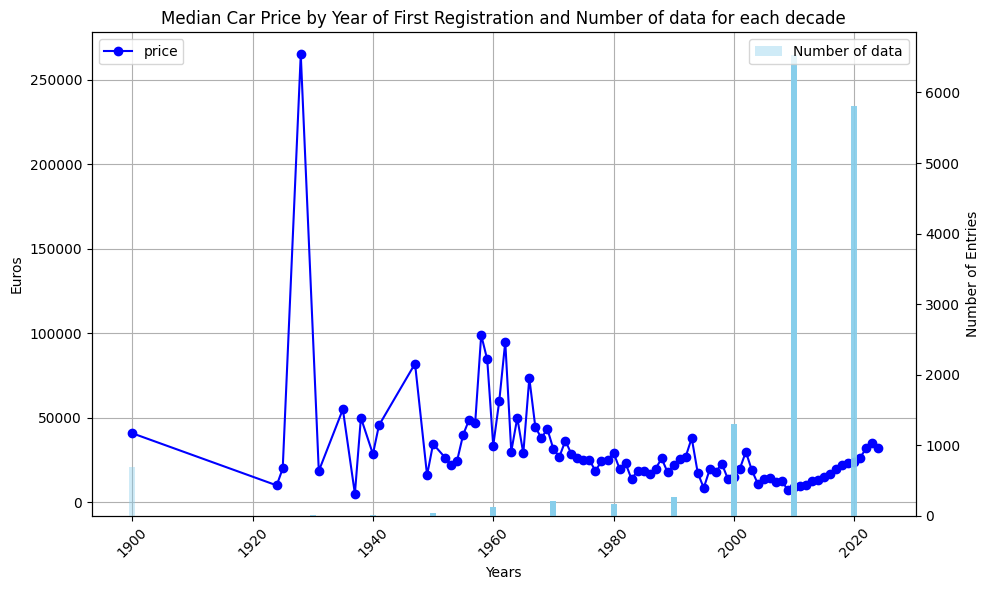

In [19]:
#only get the year
df_year['year'] = df_year['first_registration'].dt.year

# We use a threshold to avoid one huge value
price_max = 500000  
df_year = df_year[df_year['price'] <= price_max]

# get the median price by year
med_price_year = df_year.groupby('year')['price'].median()

# get the decade
df_year['decade'] = (df_year['year'] // 10) * 10

# Plots
plt.figure(figsize=(10, 6))

#plot line
ax1 = plt.gca()
med_price_year.plot(marker='o', linestyle='-', color='b')  # Line plot with markers
ax1.set_title('Median Car Price by Year of First Registration and Number of data for each decade')
ax1.set_xlabel('Years')
ax1.set_ylabel('Euros')
ax1.grid(True)
ax1.tick_params(axis='x', rotation=45)

# Plot histo
ax2 = ax1.twinx()  
decade_ticks = med_price_year.index // 10 * 10  
decade_counts = df_year['decade'].value_counts().reindex(decade_ticks, fill_value=0)  
ax2.bar(decade_counts.index, decade_counts.values, width=1, alpha=0.4, color='skyblue', label='Number of data')
ax2.set_ylabel('Number of Entries')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()


C:\Users\Damian\AppData\Local\Temp\ipykernel_40812\2583766912.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year['year'] = df_year['first_registration'].dt.year


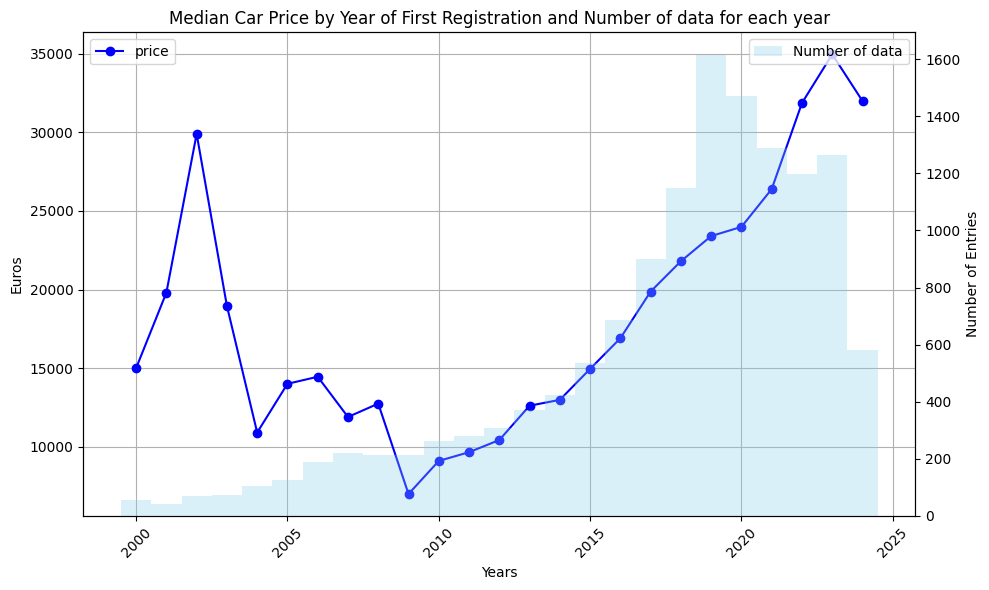

In [20]:
# We see that we have less data until year 2000 (Note that 1900 is the data for unkown date)
# So lets plot in rage of 2000 to today (Note, no more need of threshold)

#only get the year
df_year['year'] = df_year['first_registration'].dt.year


# Filter the data to only include years 2000 and later
df_year = df_year[df_year['year'] >= 2000]

# get the median price by year
med_price_year = df_year.groupby('year')['price'].median()

# Plots
plt.figure(figsize=(10, 6))

#plot line
ax1 = plt.gca()
med_price_year.plot(marker='o', linestyle='-', color='b')  # Line plot with markers
ax1.set_title('Median Car Price by Year of First Registration and Number of data for each year')
ax1.set_xlabel('Years')
ax1.set_ylabel('Euros')
ax1.grid(True)
ax1.tick_params(axis='x', rotation=45)

# Plot histo
ax2 = ax1.twinx()  
year_ticks = med_price_year.index   
year_counts = df_year['year'].value_counts().reindex(year_ticks, fill_value=0)  
ax2.bar(year_counts.index, year_counts.values, width=1, alpha=0.3, color='skyblue', label='Number of data')
ax2.set_ylabel('Number of Entries')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

### Analyse Price by mileage (km) 

In this analysis, we first drop the data without mileage.

Than we scatter plot every price in function of his amount of kilometers. We can observe a Trend in the point. The price decrease more the kilometers increase. To be sure, we used the polyfit function, wich minimize the squared error in to plot a cuve, and we can see in order 1 we have a line the passes 0 too urly. Il order 2 we see that the price will increase. But in order 3, we can see a clean expodential decrease. So we keep this one.

Note that the data have threshold. some points were outsider and were too expensiv or add too many kilometer in comparaison to the others

In [61]:
# df_analyse[df_analyse['mileage'] == 'unknown'].info()
# 181 without mileage -> So we need to drop the unknown
df_mileage = df_analyse[df_analyse['mileage'] != 'unknown']
df_mileage['price'] = pd.to_numeric(df_mileage['price'], errors='coerce')
df_mileage['mileage'] = pd.to_numeric(df_mileage['mileage'], errors='coerce')
df_mileage.dropna(subset=['price', 'mileage'], inplace=True)

df_mileage.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15243 entries, 0 to 15425
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   url                 15243 non-null  object        
 1   brand               15243 non-null  object        
 2   model               15243 non-null  object        
 3   price               15243 non-null  float64       
 4   first_registration  15243 non-null  datetime64[ns]
 5   mileage             15243 non-null  int64         
 6   fuel_type           15243 non-null  object        
 7   color               15243 non-null  object        
 8   gearbox             15243 non-null  object        
 9   power               15007 non-null  float64       
 10  engine_size         14411 non-null  float64       
 11  seller              15243 non-null  object        
 12  location            15243 non-null  object        
 13  body_type           15243 non-null  object        


C:\Users\Damian\AppData\Local\Temp\ipykernel_40812\900475960.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mileage['price'] = pd.to_numeric(df_mileage['price'], errors='coerce')
C:\Users\Damian\AppData\Local\Temp\ipykernel_40812\900475960.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mileage['mileage'] = pd.to_numeric(df_mileage['mileage'], errors='coerce')
C:\Users\Damian\AppData\Local\Temp\ipykernel_40812\900475960.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

C:\Users\Damian\AppData\Local\Temp\ipykernel_40812\834093501.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mileage['price'] = pd.to_numeric(df_mileage['price'], errors='coerce')
C:\Users\Damian\AppData\Local\Temp\ipykernel_40812\834093501.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mileage['mileage'] = pd.to_numeric(df_mileage['mileage'], errors='coerce')
C:\Users\Damian\AppData\Local\Temp\ipykernel_40812\834093501.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

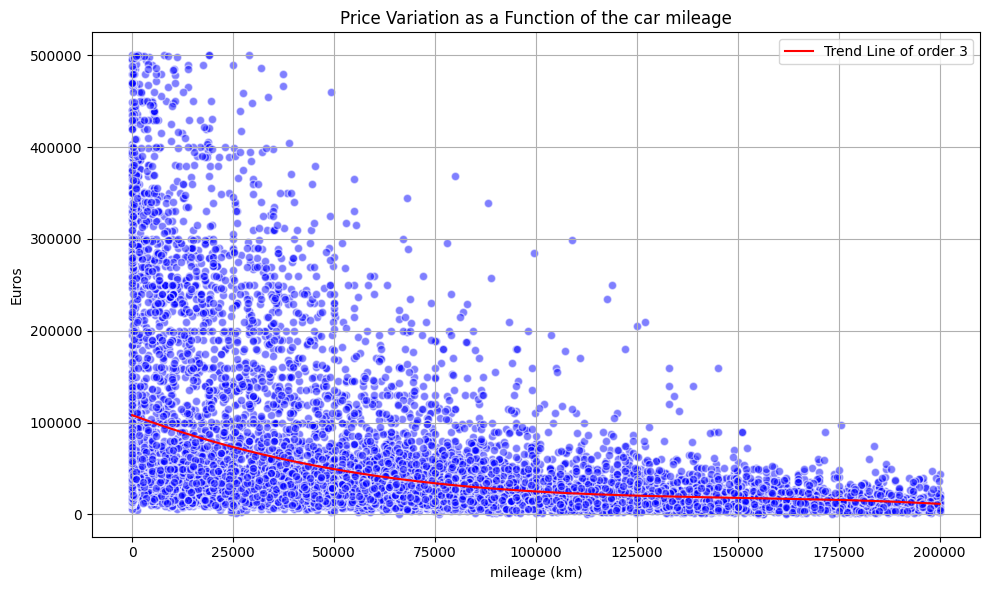

In [64]:

df_mileage = df_analyse[df_analyse['mileage'] != 'unknown']

df_mileage['price'] = pd.to_numeric(df_mileage['price'], errors='coerce')
df_mileage['mileage'] = pd.to_numeric(df_mileage['mileage'], errors='coerce')
df_mileage.dropna(subset=['price', 'mileage'], inplace=True)

#Filter the milage
# We use a threshold to avoid one huge value
price_max = 500000  
df_mileage = df_mileage[df_mileage['price'] <= price_max]

# We use a threshold to avoid one huge value
mileage_max = 200000
df_mileage = df_mileage[df_mileage['mileage'] <= mileage_max]

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_mileage['mileage'], df_mileage['price'], alpha=0.5, edgecolors='w', color='blue')
plt.title('Price Variation as a Function of the car mileage')
plt.xlabel('mileage (km)')
plt.ylabel('Euros')
plt.grid(True)

order = 3
coefficients = np.polyfit(df_mileage['mileage'], df_mileage['price'], order)
polynomial = np.poly1d(coefficients)
x_axis = np.linspace(df_mileage['mileage'].min(), df_mileage['mileage'].max(), 200)
plt.plot(x_axis, polynomial(x_axis), color='red', label=f'Trend Line of order {order}')
plt.legend()


plt.tight_layout()
plt.show()

### Analyse Price by fuel_type

I didn't really know what interesting data we can observe in this analysis. so i did the folowing:

First there are 8 fuel type (Without the unknown):
['diesel' 'gasoline' 'electric' 'lpg' 'electric/gasoline' 'others'
 'ethanol' 'electric/diesel' 'cng' 'hydrogen']

 We did 2 plot. One of the priuce the other of the count.

 We can see that:
 - Gazoline is the more commun sold, folowed by diesel and than electric.
 - The most expensive is the ethanol fuel type. But it's the less common on the dataset, same with other. So the "significative" more expensiv type would be electric/diesel (third most proposed on autoscout24.com)
 - 


In [24]:
df_fuel = df_analyse[df_analyse['fuel_type'] != 'unknown']
fuel_types = df_fuel['fuel_type'].unique()
print(fuel_types)

['diesel' 'gasoline' 'electric' 'lpg' 'electric/gasoline' 'others'
 'ethanol' 'electric/diesel' 'cng' 'hydrogen']


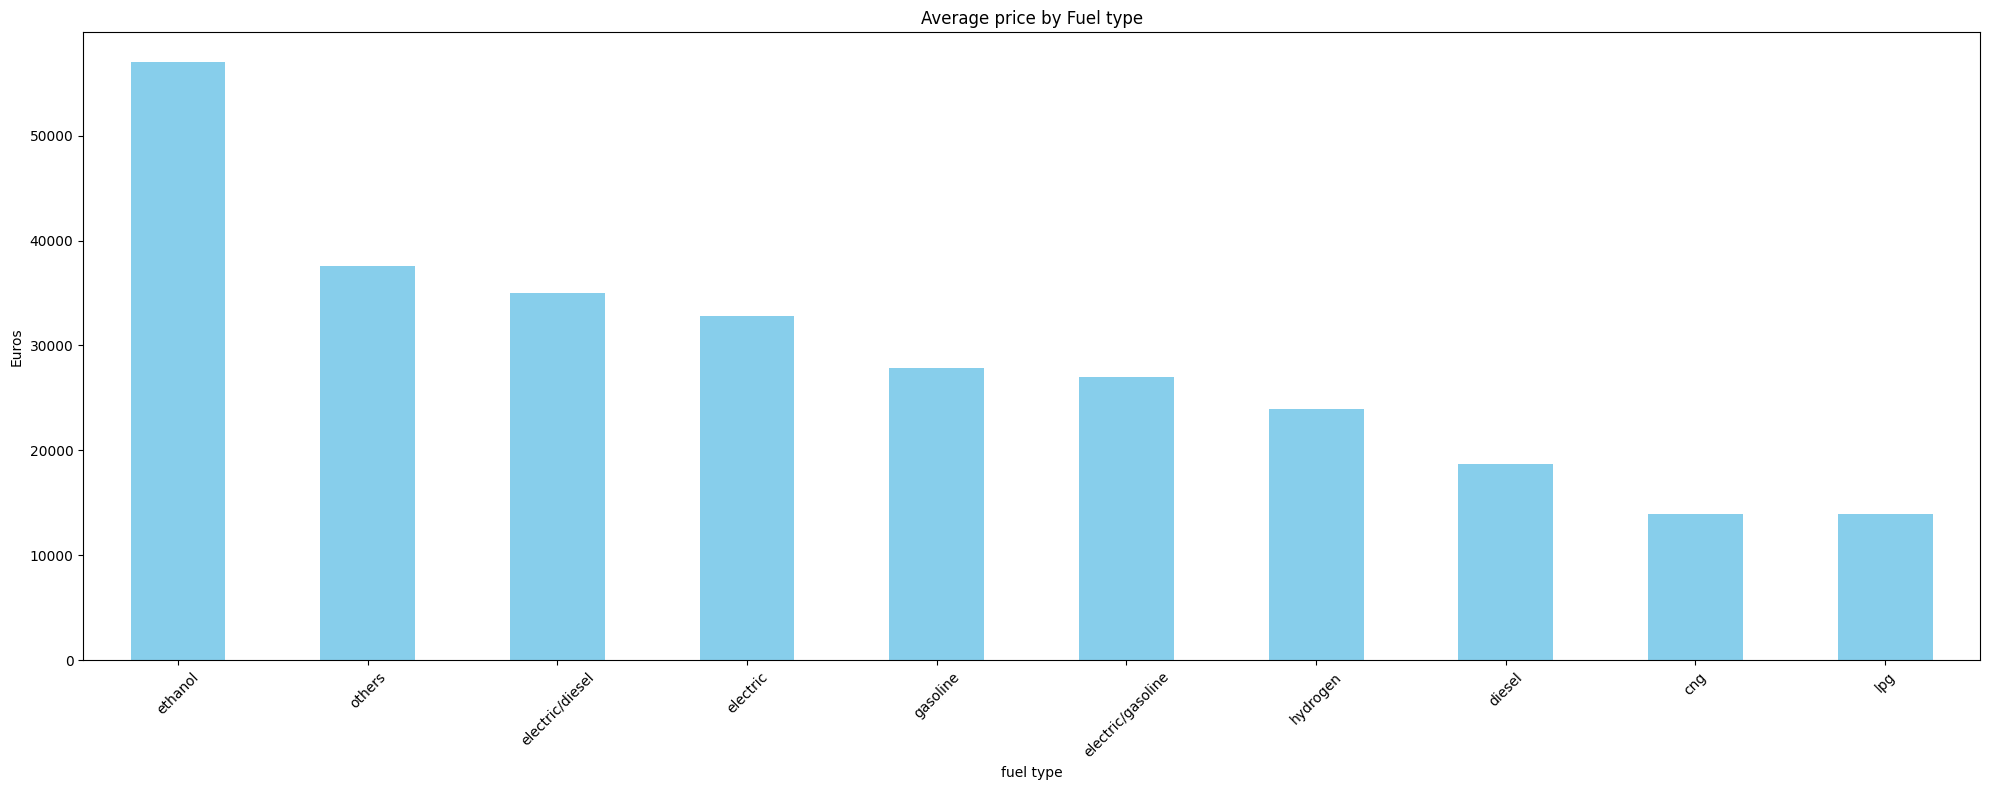

In [25]:
# Fuel analysis
med_fuel_price = df_fuel.groupby('fuel_type')['price'].median().sort_values(ascending=False)
# Plot
plt.figure(figsize=(20, 8))  
med_fuel_price.plot(kind='bar', color='skyblue')
plt.title('Average price by Fuel type')
plt.xlabel('fuel type')
plt.ylabel('Euros')
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()


fuel_type
gasoline             9250
diesel               3448
electric/gasoline    1521
electric              839
lpg                   210
electric/diesel        51
others                 46
cng                    27
ethanol                 3
hydrogen                3
Name: count, dtype: int64


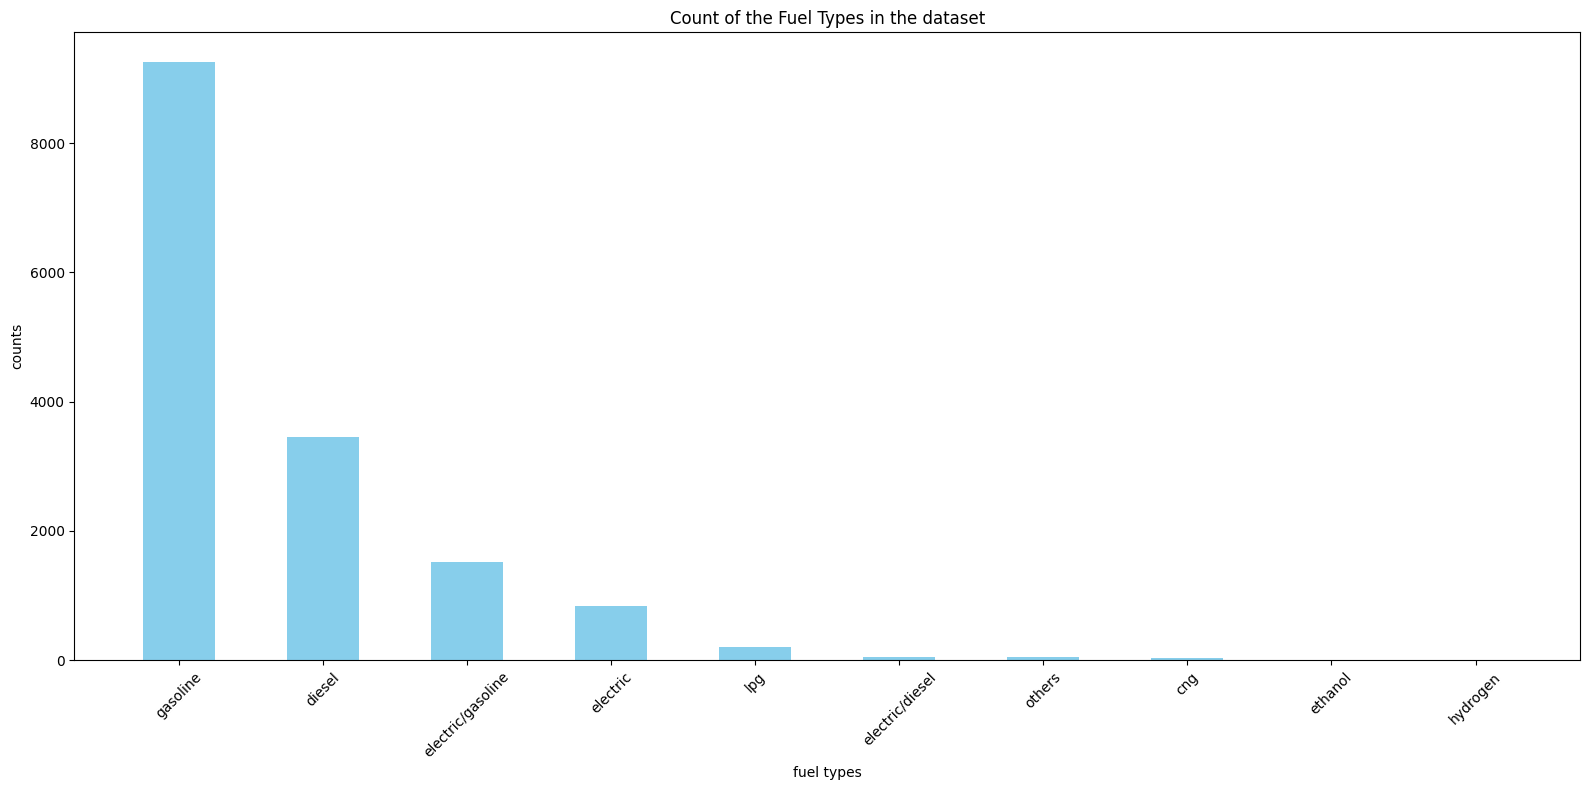

In [26]:
# Fuel count
fuel_ticks = med_fuel_price.index   
fuel_type_counts = df_fuel['fuel_type'].value_counts().reindex(fuel_ticks, fill_value=0).sort_values(ascending=False) 
print(fuel_type_counts)
# Plot 
plt.figure(figsize=(16,8))
plt.bar(fuel_type_counts.index, fuel_type_counts.values, width=0.5, alpha=1, color='skyblue')
plt.title('Count of the Fuel Types in the dataset')
plt.xlabel('fuel types')
plt.ylabel('counts')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

### Analyse Price by body type

Here is the body type analysis.

There are 9 body type on the dataset : 
['sedan' 'off-road/pick-up' 'other' 'coupe' 'van' 'station wagon'
 'convertible' 'compact' 'transporter']

The first plot represente the median price for each body type. But that was too general. Do we did an intereactive graph to observe the proportionality of bodytype in each brand to know what body type describe the most the brand.

The result make sens, Some pies are really relevant to a brand style (for example Jeep have more offread/pick-up)

In [27]:
df_body = df_analyse # [df_analyse['body_type'] != 'unknown']
body_types = df_body['body_type'].unique()
print(body_types)

['sedan' 'off-road/pick-up' 'other' 'coupe' 'van' 'station wagon'
 'convertible' 'compact' 'transporter']


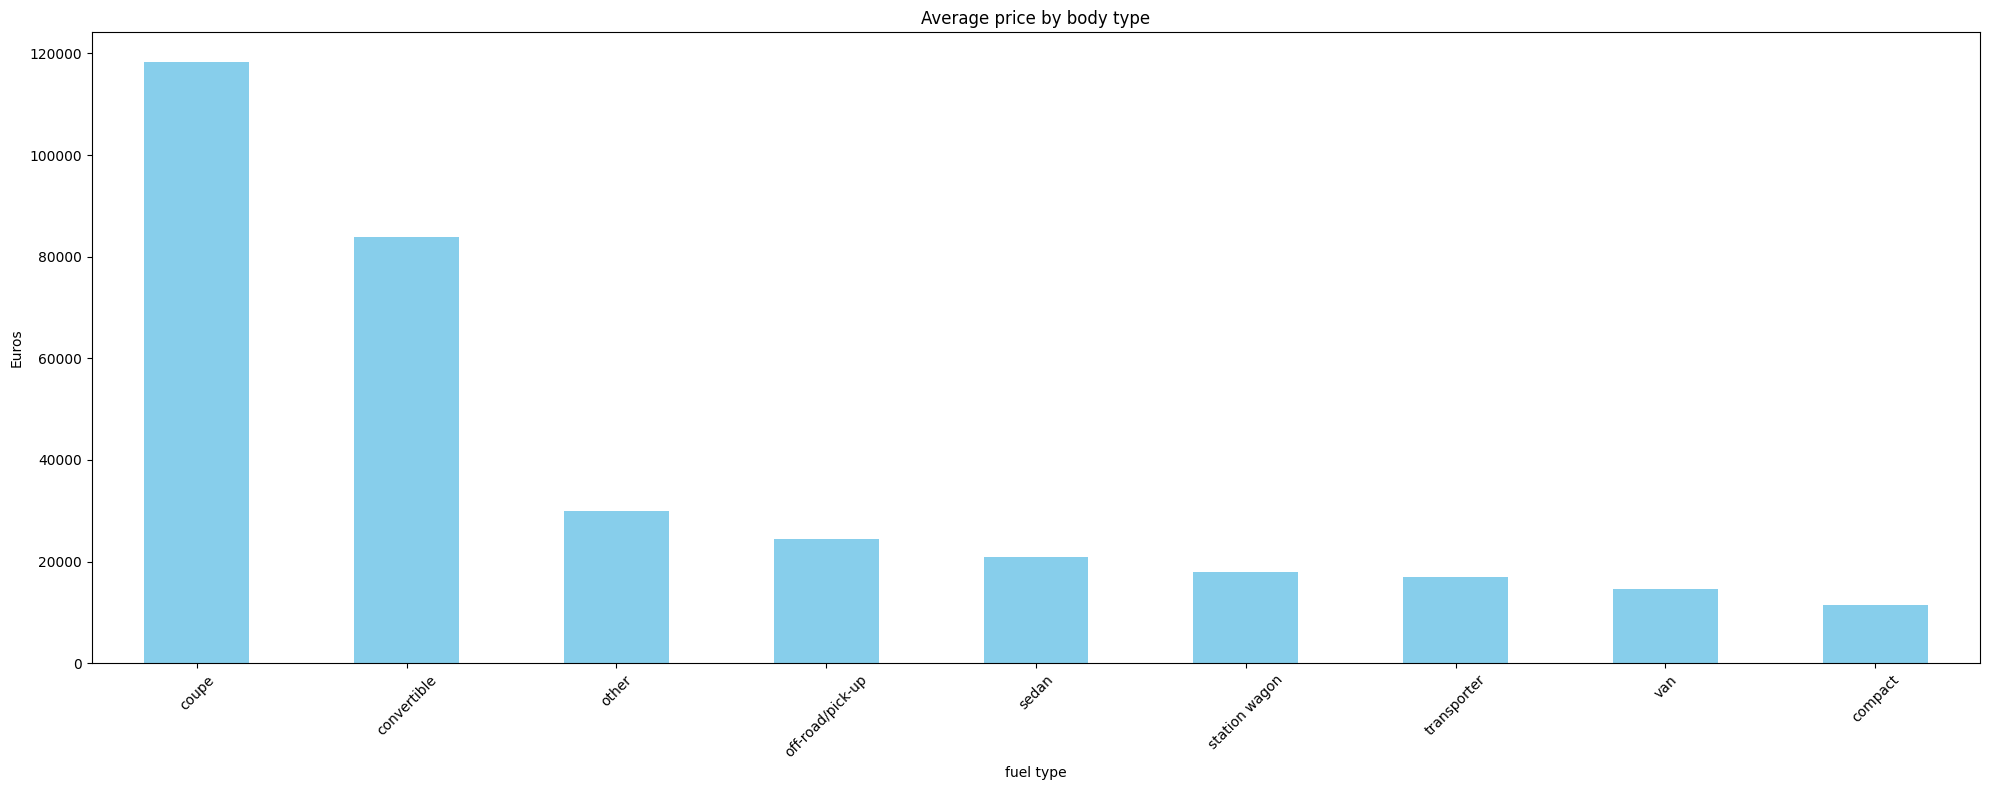

In [28]:
# Fuel analysis median price
med_body_price = df_body.groupby('body_type')['price'].median().sort_values(ascending=False)
# Plot
plt.figure(figsize=(20, 8))  
med_body_price.plot(kind='bar', color='skyblue')
plt.title('Median price price by body type')
plt.xlabel('fuel type')
plt.ylabel('Euros')
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

In [29]:
brands = df_body['brand'].unique()

Dropdown(description='Brand:', index=17, options=('alfa romeo', 'aston martin', 'audi', 'bentley', 'bmw', 'bug…

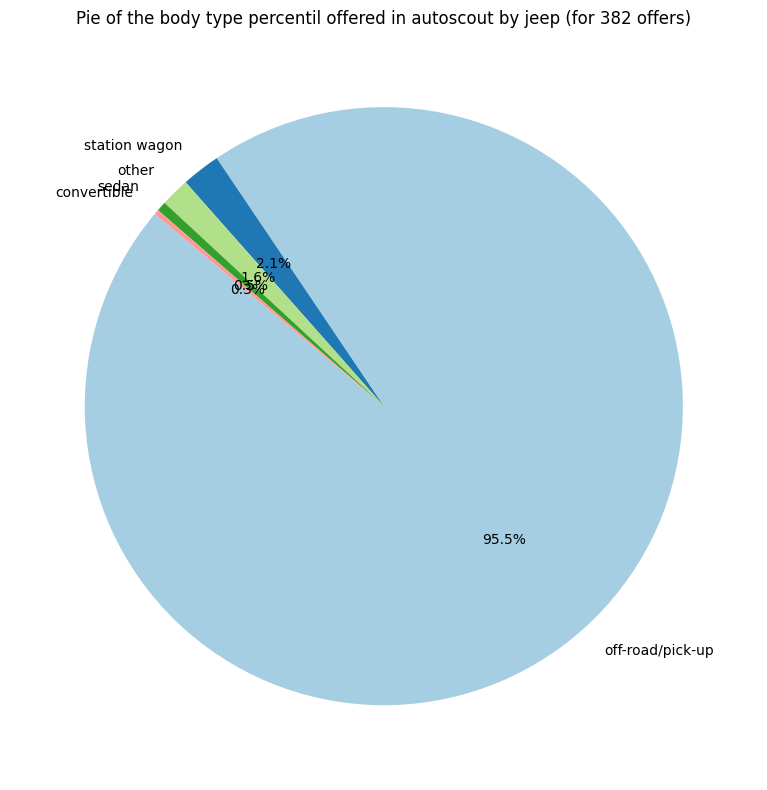

In [68]:
brand_selector = widgets.Dropdown(
    options=sorted(brands),
    value='renault',  # Default value
    description='Brand:',
    disabled=False,
)

# Fucntion to update and plot
def update_plot_pie(brand):
    clear_output(wait=True)
    display(brand_selector)
    df_body_brand = df_body[df_body['brand'] == brand]
    count_by_Brand = df_body_brand['body_type'].value_counts()
    ndata = count_by_Brand.sum()

    plt.figure(figsize=(20, 8))
    plt.pie(count_by_Brand, labels= count_by_Brand.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(count_by_Brand))))
    plt.title(f'Pie of the body type percentil offered in autoscout by {brand} (for {ndata} offers)')
    plt.tight_layout()
    plt.show()

# function when changing the value
def on_brand_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        update_plot_pie(change['new'])

brand_selector.observe(on_brand_change)

update_plot_pie(brand_selector.value)
